In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
df=pd.read_csv("Kmean.csv")
df

,Name,m1,m2
0,shyam,5.0,4.0
1,hari,4.5,4.0
2,ram,3.5,4.5
3,gita,3.0,2.0
4,sita,2.5,3.0
5,harka,2.0,2.0
6,sudhan,5.0,5.0
7,rahul,4.5,3.0
8,anil,3.5,2.5
9,nikhil,3.0,3.0


In [5]:
label=LabelEncoder()
for i in df.select_dtypes(include=["object"]):
    df[i]=label.fit_transform(df[i])

df

,Name,m1,m2
0,20,5.0,4.0
1,5,4.5,4.0
2,16,3.5,4.5
3,4,3.0,2.0
4,22,2.5,3.0
5,7,2.0,2.0
6,23,5.0,5.0
7,14,4.5,3.0
8,1,3.5,2.5
9,11,3.0,3.0


In [6]:
X=df

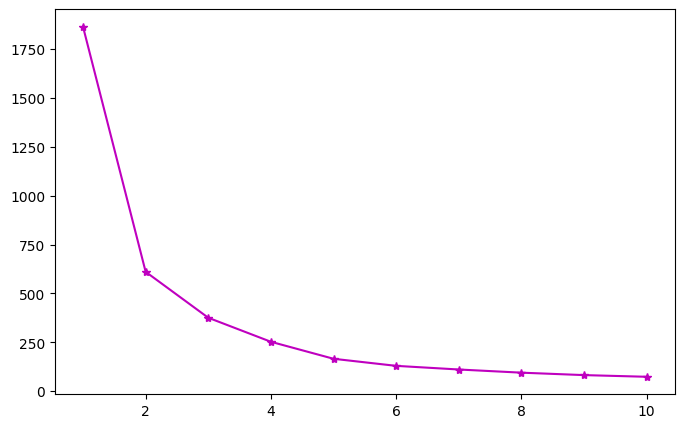

In [7]:
msc=[]
krange=range(1,11)
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=42)
    km.fit(X)
    msc.append(km.inertia_)
msc
plt.figure(figsize=(8,5))
plt.plot(krange,msc,marker="*",c="m")
plt.show()

In [8]:
model=KMeans(n_clusters=2,random_state=42)
df["clu"]=model.fit_predict(X)


In [9]:
df

,Name,m1,m2,clu
0,20,5.0,4.0,1
1,5,4.5,4.0,0
2,16,3.5,4.5,1
3,4,3.0,2.0,0
4,22,2.5,3.0,1
5,7,2.0,2.0,0
6,23,5.0,5.0,1
7,14,4.5,3.0,1
8,1,3.5,2.5,0
9,11,3.0,3.0,0


In [10]:
model.n_iter_

5

In [11]:
model.labels_

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1], dtype=int32)

In [12]:
mo=model.cluster_centers_
mo

array([[ 6.        ,  3.03846154,  2.19230769],
       [19.5       ,  3.10714286,  4.07142857]])

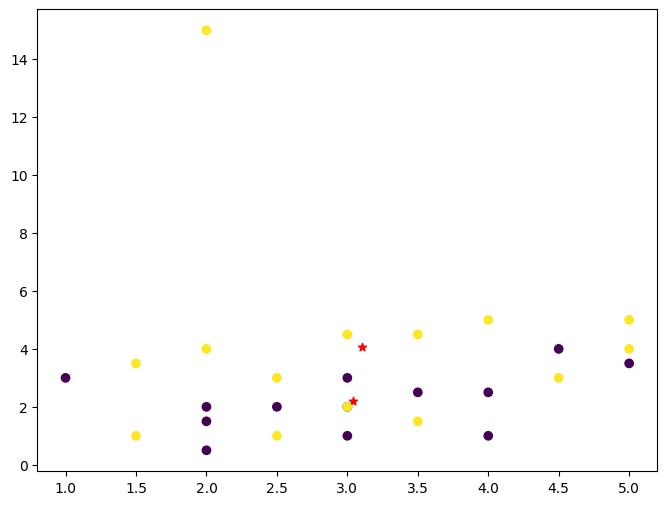

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(mo[:,1],mo[:,2],c="red",marker="*")
plt.scatter(df["m1"],df["m2"],c=df["clu"])
plt.show()

In [14]:
new=pd.DataFrame({
    "Name":label.fit_transform(["maya"]),
    "m1":[5.0],
    "m2":[4.0]
})
pdr=model.predict(new)
pdr

array([0], dtype=int32)